In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [4]:
emp_data = pd.read_csv('employee_attrition_data.csv')

In [5]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [6]:
emp_data.describe(include='all')

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,2,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,Sales,Engineer,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,506,209,214,NaN,NaN,NaN,NaN,NaN,NaN
mean,499.500000,42.205000,NaN,NaN,NaN,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,288.819436,10.016452,NaN,NaN,NaN,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,0.000000,25.000000,NaN,NaN,NaN,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,249.750000,33.000000,NaN,NaN,NaN,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,499.500000,43.000000,NaN,NaN,NaN,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,749.250000,51.000000,NaN,NaN,NaN,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000


In [7]:
emp_data.shape

(1000, 11)

In [8]:
emp_data.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [10]:
emp_data.isnull().sum(axis=0)

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [11]:
emp_data.nunique()


Employee_ID              1000
Age                        35
Gender                      2
Department                  5
Job_Title                   5
Years_at_Company           10
Satisfaction_Level       1000
Average_Monthly_Hours     100
Promotion_Last_5Years       2
Salary                    995
Attrition                   2
dtype: int64

In [12]:
emp_eda = emp_data.copy()


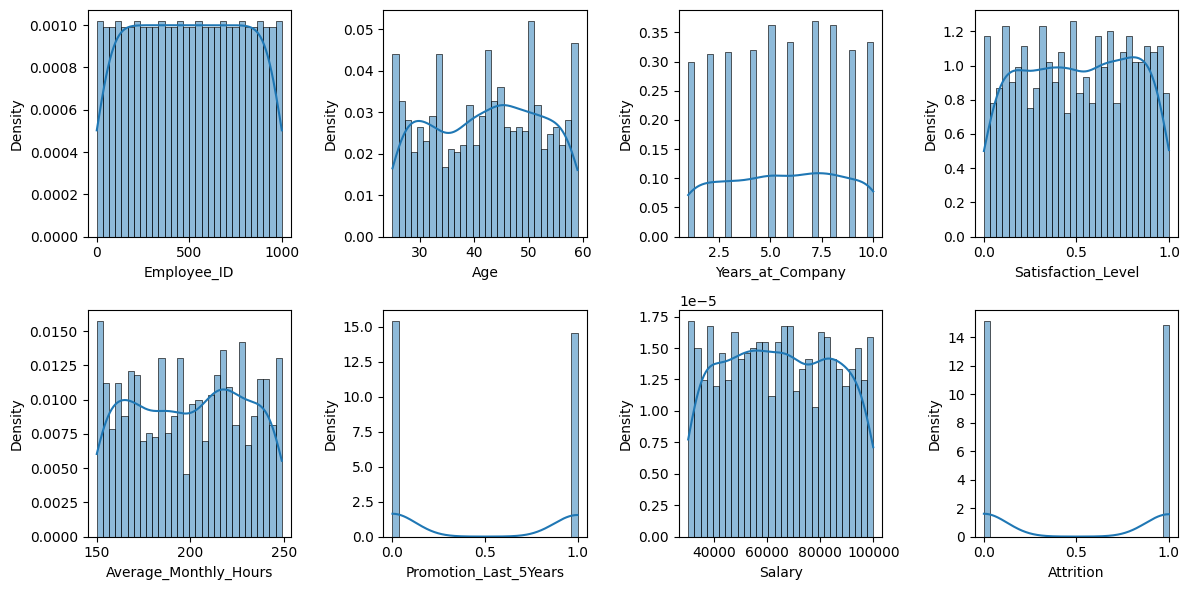

In [13]:
num_cols_eda = [n for n in emp_eda.columns if emp_eda[n].dtypes!='O']

fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    sns.histplot(emp_eda[col],kde=True,stat='density',bins=30,ax=ax[i])

plt.tight_layout()
plt.show()

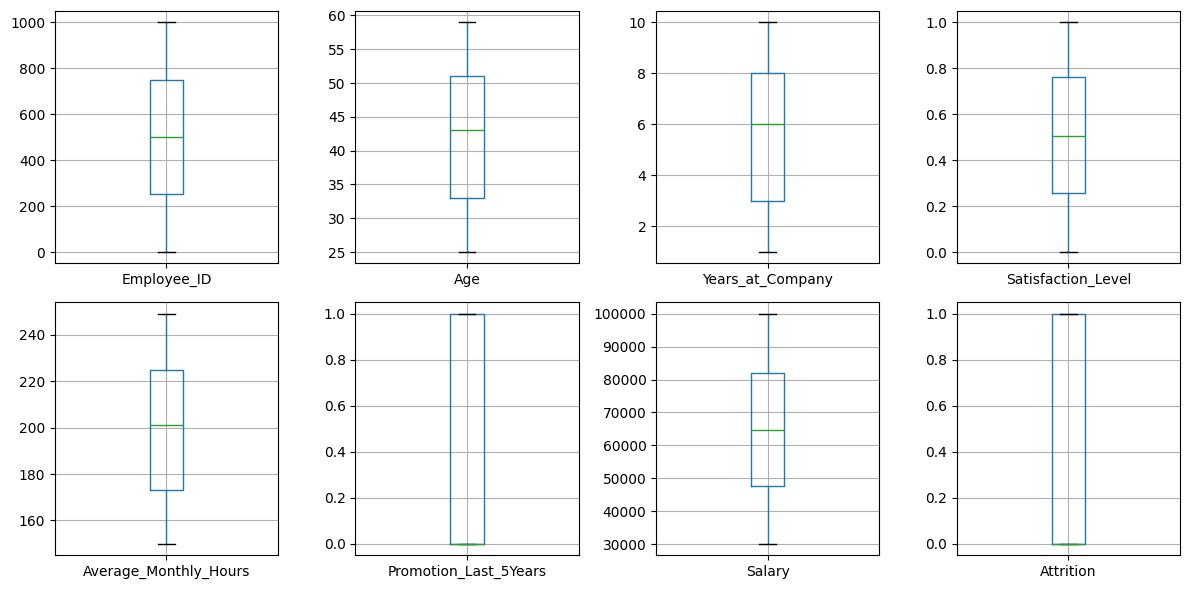

In [14]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    emp_eda.boxplot(col, ax=ax[i])

plt.tight_layout()
plt.show()

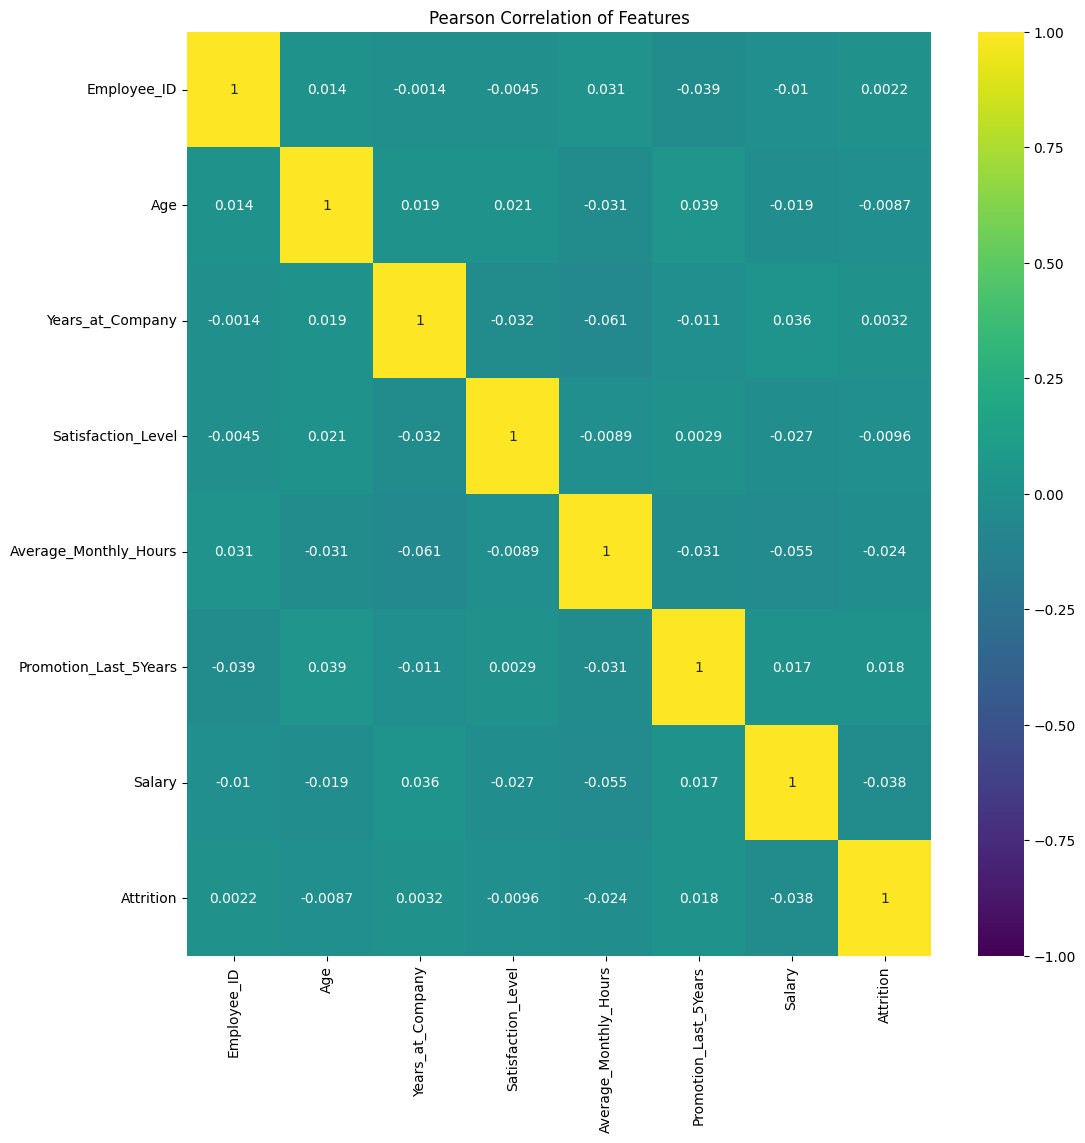

In [15]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', size=12)
ax = sns.heatmap(emp_eda[num_cols_eda].corr(), cmap=colormap, annot=True, vmin=-1, vmax=1)
plt.show()

In [16]:
cat_cols_eda = [c for c in emp_eda.columns if emp_eda[c].dtypes=='O']


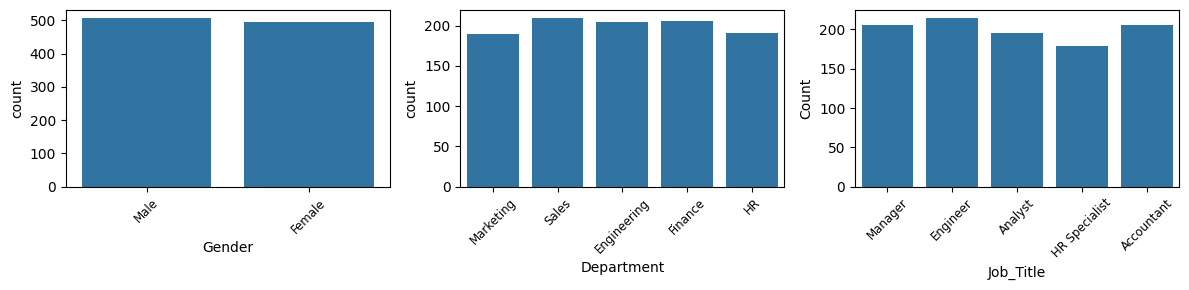

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax = ax.flatten()

for i, col in enumerate(cat_cols_eda):
    sns.countplot(x=col, data=emp_eda, ax=ax[i])
    plt.ylabel('Count')
    ax[i].tick_params(axis='x', rotation=45, labelsize=8.5)

plt.tight_layout()
plt.show()

In [18]:
emp_data = emp_data.drop(columns=['Employee_ID'])


In [19]:
gender_mapping = {'Male': 0, 'Female': 1}
emp_data['Gender'] = emp_data['Gender'].map(gender_mapping)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    emp_data.drop('Attrition', axis=1), emp_data['Attrition'], test_size=0.2, random_state=69, stratify=emp_data['Attrition'])

X_train.shape, X_test.shape

((800, 9), (200, 9))

In [21]:
y_train.shape, y_test.shape


((800,), (200,))

In [22]:
ohe_enc = OneHotEncoder(
    top_categories=None,
    variables=['Department','Job_Title'], 
    drop_last=False)
ohe_enc.fit(X_train)

OneHotEncoder(variables=['Department', 'Job_Title'])

In [23]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

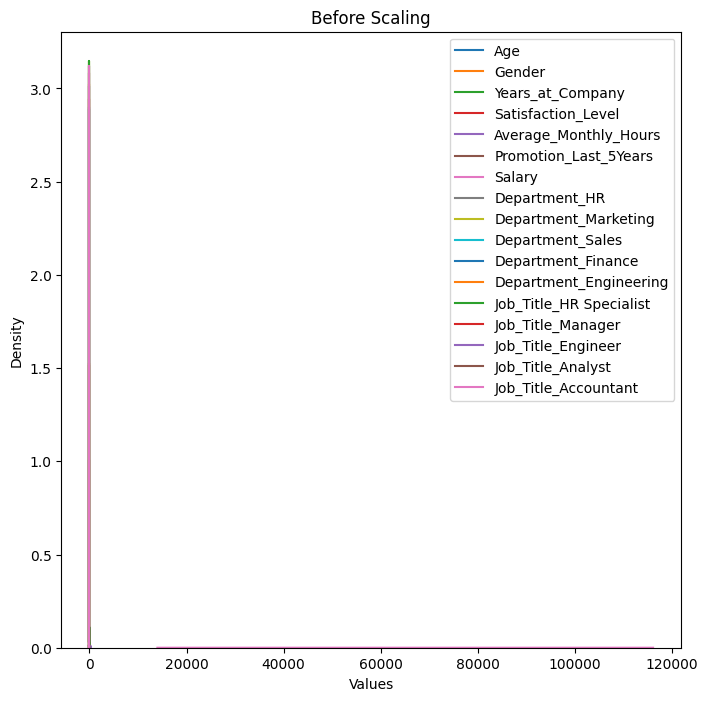

In [24]:
plt.figure(figsize=(8, 8))
plt.title('Before Scaling')
plt.xlabel('Values')
for col in X_train.columns:
    sns.kdeplot(X_train[col], label=col)
plt.legend()
plt.show()

In [25]:
scaler = StandardScaler()

for col in X_train.columns:
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

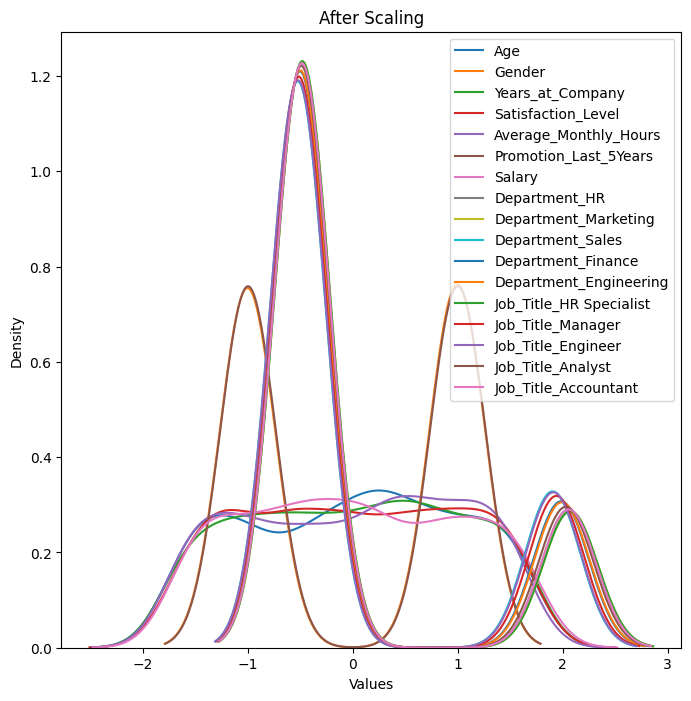

In [26]:
plt.figure(figsize=(8, 8))
plt.title('After Scaling')
plt.xlabel('Values')
for col in X_train.columns:
    sns.kdeplot(X_train[col], label=col)
plt.legend()
plt.show()

In [27]:
log_reg = LogisticRegression(random_state=69)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

Logistic Regression Accuracy: 0.475
ROC AUC Score: 0.4437443744374437


In [28]:
rf_clf = RandomForestClassifier(random_state=69)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))

Random Forest Classifier Accuracy: 0.425
ROC AUC Score: 0.4323932393239324


In [29]:
adb = AdaBoostClassifier(random_state=69)
adb.fit(X_train, y_train)

y_pred_adb = adb.predict(X_test)

print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_adb))
print("ROC AUC Score:", roc_auc_score(y_test, adb.predict_proba(X_test)[:, 1]))

AdaBoost Classifier Accuracy: 0.47
ROC AUC Score: 0.4482948294829483
